In [11]:
from numpy import random 
import numpy as np 
import matplotlib.pyplot as plt

In [12]:
def mandelbrot(c,max_iters):
    '''
    Function to check if a Complex Number c= x+iy is in the Mandelbrot Set 
    Inputs:
    c (Complex): The complex number that is to be checked
    max_iters(int): The number of iterations to be performed
    Returns:
    If the c escapes the threshold before reaching max_iters, returns the number
    of iterations taken to escape the threshold else returns max_iters
    '''
    counter=0
    threshold=2
    Z_now=complex(0,0)
    while(counter<max_iters):
        Z_next=pow(Z_now,2)+c
        if(abs(Z_next)>threshold):
            return counter
        Z_now=Z_next
        counter+=1
    return max_iters

In [13]:
def point_counter(x,y,max_iters):
    '''
    Function to count number of points in the Mandelbrot Set
    '''
    counter=0
    for i,x_i in enumerate(x):
        c=complex(x_i,y[i])
        check=mandelbrot(c,max_iters)
        if check==max_iters : counter+=1
    return counter


In [14]:
def create_grid(x,y,max_iters):
    '''
    Function to create a Grid to plot all the points in the defined boundaries 
    '''
    X,Y=np.meshgrid(x,y)
    C=np.vectorize(complex)(X,Y) 
    Z=[]
    for row in C: 
        Z_row=[]  
        for c in row: 
            Z_row.append(mandelbrot(c,max_iters))
        Z.append(Z_row) 
    Z=np.array(Z)
    return Z


In [15]:
def plot_fractal(Z,x1,x2,y1,y2):
    plt.figure(figsize=(10,7))
    plt.imshow(Z,extent=(x1,x2,y1,y2),cmap='Blues_r',interpolation='bilinear')
    plt.colorbar(label='Iterations to escape')
    plt.title('Mandelbrot Set')
    plt.xlabel('Re(c)')
    plt.ylabel('Im(c)')
    plt.show()



In [6]:
# max_iters=100
# n=1000
# x=np.linspace(-1.7,1.7,100)  
# y=np.linspace(-2,2.5,100)
# plot_fractal(create_grid(x,y,max_iters),min(x),max(x),min(y),max(y),)

In [21]:
def area_estimate(x,y,max_iters):
    a=point_counter(x,y,max_iters)# Number of points in the mandelbrot set
    A_total=(max(x)-min(x))*(max(y)-min(y))
    A=A_total*a/len(x)#Area estimate
    return A

In [42]:
def find_Ais(n_samples,max_iters,):
    x1,x2 = -2,2
    y1,y2 = -2,2
    x_random,y_random=[],[]
    x_random=np.random.uniform(x1,x2,n_samples)
    y_random=np.random.uniform(y1,y2,n_samples)    
#    print("The areas of ",n_samples," ",max_iters," ",area_estimate(x_random,y_random,max_iters))
    return(area_estimate(x_random,y_random,max_iters))

In [31]:
n_list = np.linspace(100, 10000, 20, dtype=int)
max_iters=[100]
for i in n_list:
    for j in max_iters:
        find_Ais(i,j)

The areas of  100   100   1.5657221723623787
The areas of  621   100   1.3364139636220154
The areas of  1142   100   1.5516875802217935
The areas of  1663   100   1.5469121621923154
The areas of  2184   100   1.6398517301374358
The areas of  2705   100   1.5812875322802
The areas of  3226   100   1.4763074703711903
The areas of  3747   100   1.4883054196859977
The areas of  4268   100   1.593672879003915
The areas of  4789   100   1.5128022966906285
The areas of  5310   100   1.656540917401718
The areas of  5831   100   1.4972242923213297
The areas of  6352   100   1.6015898293982869
The areas of  6873   100   1.4956824475680655
The areas of  7394   100   1.5077335079392458
The areas of  7915   100   1.4214275816733155
The areas of  8436   100   1.4826704342839974
The areas of  8957   100   1.5518647111790744
The areas of  9478   100   1.5506685163214284
The areas of  10000   100   1.5528728246916261


In [50]:
def diff_areas(n_list,iters_list):
    A=[]
    A_m=1.506484
    for i in n_list:
        for j in iters_list:
            A.append(find_Ais(i,j))
    A=np.array(A)
    A=abs((A-A_m)/A)
    plot_diffs(A,n_list)

In [55]:
def plot_diffs(diff_areas,n_list):
    plt.figure(figsize=(10, 5))
    plt.plot(n_list, diff_areas, linestyle='-', linewidth=1, markersize=4)
    plt.title("Convergence of Mandelbrot Set Area Estimate")
    plt.xlabel("Number of Samples")
    plt.ylabel("Relative Difference in Area Estimate")
    plt.grid()
    plt.show()

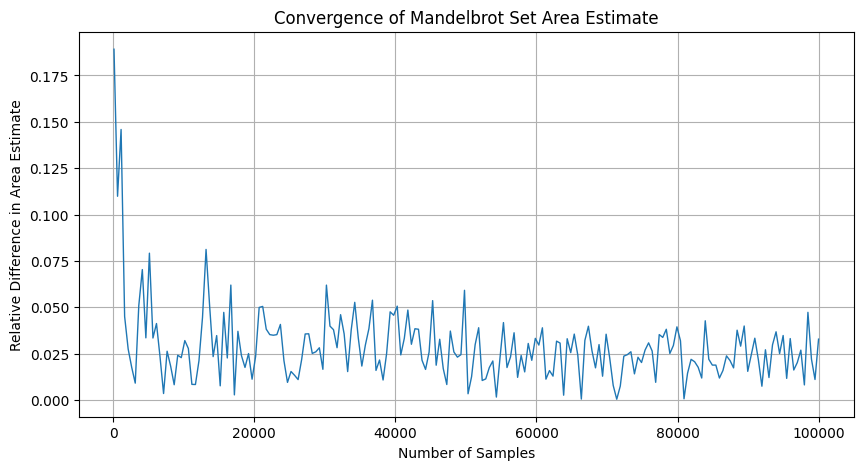

In [56]:
n_list = np.linspace(100, 100000, 200, dtype=int)
iters_list=[100]
diff_areas(n_list,iters_list)

In [33]:
print(abs(3-5))

2
